In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import ast
from matplotlib import pyplot as plt
import seaborn as sns


dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_fr = df[df["job_country"] == "France"]

In [3]:
df_skills = df_fr.explode("job_skills")
df_skills[["job_title","job_skills"]]

,job_title,job_skills
12,Stagiaire Data Analyst (H/F) - Lyon (69006),sql
12,Stagiaire Data Analyst (H/F) - Lyon (69006),php
12,Stagiaire Data Analyst (H/F) - Lyon (69006),excel
12,Stagiaire Data Analyst (H/F) - Lyon (69006),power bi
12,Stagiaire Data Analyst (H/F) - Lyon (69006),sap
...,...,...
785693,Senior Data Scientist BI,pandas
785693,Senior Data Scientist BI,numpy
785693,Senior Data Scientist BI,keras
785693,Senior Data Scientist BI,pytorch


In [8]:
df_skills_count = df_skills.groupby(["job_skills","job_title_short"]).size()
df_skills_count = df_skills_count.reset_index(name="skill_count")
df_skills_count.sort_values(by="skill_count", ascending=False, inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
944,python,Data Scientist,6320
1211,sql,Data Analyst,6213
943,python,Data Engineer,6188
1212,sql,Data Engineer,5319
942,python,Data Analyst,4506
...,...,...,...
289,drupal,Cloud Engineer,1
1163,solidity,Senior Data Engineer,1
1162,solidity,Data Scientist,1
309,electron,Business Analyst,1


In [13]:
job_titles = df_skills_count["job_title_short"].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

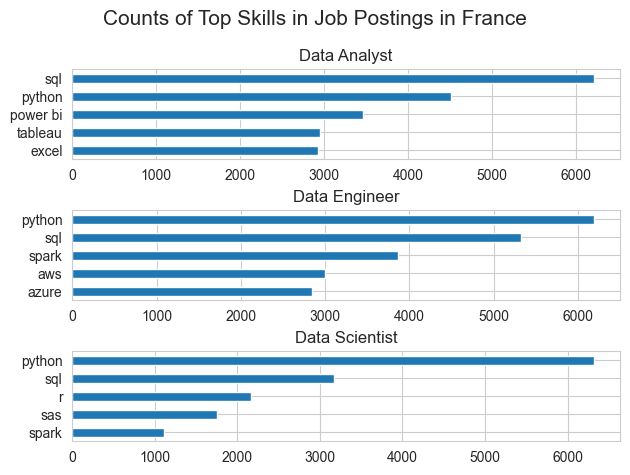

In [23]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head(5)
    df_plot.plot(kind="barh",x="job_skills",y="skill_count",ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)
    
fig.suptitle("Counts of Top Skills in Job Postings in France", fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show() 

In [25]:
df_job_title_count = df_fr["job_title_short"].value_counts().reset_index(name="jobs_total")

In [30]:
df_skills_percent = pd.merge(df_skills_count, df_job_title_count, how="left", on="job_title_short")
df_skills_percent["skill_percent"] = 100 * df_skills_percent["skill_count"] / df_skills_percent["jobs_total"]
df_skills_percent

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,6320,9497,66.547331
1,sql,Data Analyst,6213,13803,45.011954
2,python,Data Engineer,6188,10936,56.583760
3,sql,Data Engineer,5319,10936,48.637527
4,python,Data Analyst,4506,13803,32.645077
...,...,...,...,...,...
1469,drupal,Cloud Engineer,1,338,0.295858
1470,solidity,Senior Data Engineer,1,1186,0.084317
1471,solidity,Data Scientist,1,9497,0.010530
1472,electron,Business Analyst,1,738,0.135501


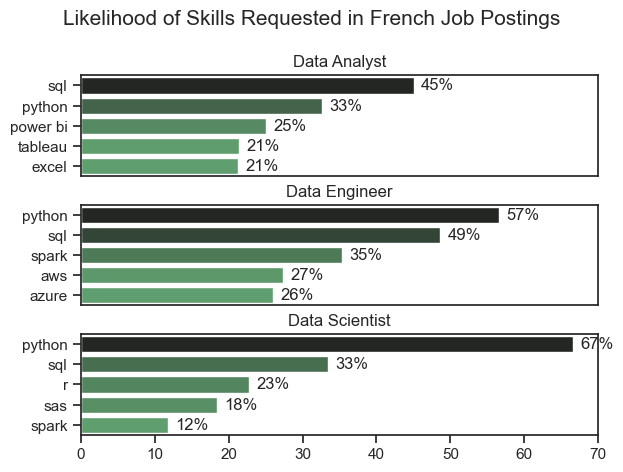

In [46]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style="ticks")

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_percent[df_skills_percent["job_title_short"] == job_title].head(5)
    sns.barplot(data=df_plot,x="skill_percent",y="job_skills",ax=ax[i], hue="skill_count",palette="dark:g_r")
    ax[i].set_title(job_title)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("")
    ax[i].get_legend().remove()
    ax[i].set_xlim(0,70)
    for n, v in enumerate(df_plot["skill_percent"]):
        ax[i].text(v + 1, n, f"{v:.0f}%", va="center")
        
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])
        
        
fig.suptitle("Likelihood of Skills Requested in French Job Postings", fontsize=15)
fig.tight_layout(h_pad=0.5)
plt.show() 